In [1]:
import pandas as pd

# Import the data using the file path
#filepath = os.sep.join(data_path + ['Orange_Telecom_Churn_Data.csv'])
filepath = 'orange.csv'
data = pd.read_csv(filepath)

In [2]:

data.head(1).T

,0
state,KS
account_length,128
area_code,415
phone_number,382-4657
intl_plan,no
voice_mail_plan,yes
number_vmail_messages,25
total_day_minutes,265.1
total_day_calls,110
total_day_charge,45.07


In [3]:
# Remove extraneous columns
data.drop(['state', 'area_code', 'phone_number'], axis=1, inplace=True)

In [4]:
data.columns

Index(['account_length', 'intl_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls', 'churned'],
      dtype='object')

In [5]:

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

for col in ['intl_plan', 'voice_mail_plan', 'churned']:
    data[col] = lb.fit_transform(data[col])

In [6]:
# Mute the sklearn warning
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.preprocessing import MinMaxScaler

msc = MinMaxScaler()

data = pd.DataFrame(msc.fit_transform(data),  # this is an np.array, not a dataframe.
                    columns=data.columns)

In [7]:
# Get a list of all the columns that don't contain the label
x_cols = [x for x in data.columns if x != 'churned']

# Split the data into two dataframes
X_data = data[x_cols]
y_data = data['churned']

# # alternatively:
# X_data = data.copy()
# y_data = X_data.pop('churned')

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data)

In [9]:
# Function to calculate the % of values that were correctly predicted

def accuracy(real, predict):
    return sum(real == predict) / float(real.shape[0])

In [10]:
print(accuracy(y_data, y_pred))

0.9422


In [11]:
knn2 = KNeighborsClassifier(n_neighbors=3, weights = 'distance')
knn2 = knn2.fit(X_data, y_data)
y_pred2 = knn2.predict(X_data)
print(accuracy(y_data, y_pred2))

1.0


In [12]:
knn3 = KNeighborsClassifier(n_neighbors=3, p =1)
knn3 = knn3.fit(X_data, y_data)
y_pred3 = knn3.predict(X_data)
print(accuracy(y_data, y_pred3))

0.9456


In [13]:
k_values = [i for i in range(1,21)]
accuracies = []

In [14]:
for i in k_values :
    knnx = KNeighborsClassifier(n_neighbors=i)
    knnx = knnx.fit(X_data, y_data)
    y_predx = knnx.predict(X_data)
    acc = accuracy(y_data, y_predx)
    accuracies.append(acc)

Text(0.5,1,'accuracies vs k')

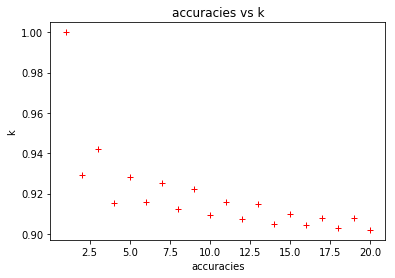

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_values, accuracies,'r+')
plt.xlabel('accuracies')
plt.ylabel('k')
plt.title('accuracies vs k')